<a href="https://colab.research.google.com/github/AntonioMatheus08/Projeto_cd/blob/main/Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto final - Desgaste de Pastilha de freio no ambiente rodovi√°rio

# Defini√ß√£o do Problema
O dataset utilizado neste projeto √© proveniente de um estudo sobre o desgaste de pastilhas de freio, representando um caso real da ind√∫stria rodovi√°ria. O objetivo √© prever a quilometragem restante at√© a troca das pastilhas de freio com base em certos coeficientes de desgaste. Este dataset √© um subconjunto de dados coletados que incluem informa√ß√µes sobre a varia√ß√£o de desgaste ao longo do tempo e a quilometragem dos ve√≠culos.

O dataset apresenta diversos atributos relacionados ao desgaste das pastilhas e √† quilometragem dos ve√≠culos, juntamente com uma vari√°vel dependente que indica a quilometragem restante. As vari√°veis preditoras incluem as varia√ß√µes de desgaste em diferentes rodas e a quilometragem total do ve√≠culo.

Para mais detalhes sobre este dataset, consulte: Link para o Dataset

Informa√ß√µes sobre os Atributos:
Varia√ß√£o DD: Varia√ß√£o do desgaste na pastilha da Dianteira Direita.
Varia√ß√£o DE: Varia√ß√£o do desgaste na pastilha da Dianteira Esquerda.
Varia√ß√£o TD: Varia√ß√£o do desgaste na pastilha da Traseira Direita.
Varia√ß√£o TE: Varia√ß√£o do desgaste na pastilha da Traseira Esquerda.
km: Quilometragem total do ve√≠culo.
Coeficiente DD: Coeficiente de desgaste calculado para a Dianteira Direita.
Coeficiente DE: Coeficiente de desgaste calculado para a Dianteira Esquerda.
Coeficiente TD: Coeficiente de desgaste calculado para a Traseira Direita.
Coeficiente TE: Coeficiente de desgaste calculado para a Traseira Esquerda.
Class: Vari√°vel de classe (quilometragem restante at√© a troca).

## 1. Importando Bibliotecas Necess√°rias

Primeiramente, importamos todas as bibliotecas necess√°rias e suprimimos quaisquer avisos n√£o cr√≠ticos para uma sa√≠da mais limpa.

In [67]:
# Importando Bibliotecas Necess√°rias e Suprimindo Avisos
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



warnings.filterwarnings('ignore')

# Carregar o conjunto de dados
url = "https://raw.githubusercontent.com/AntonioMatheus08/Projeto_cd/refs/heads/main/Dados_Trat_v4%20-%20P%C3%A1gina1.csv"
data = pd.read_csv(url)

# Ajustar os valores num√©ricos e converter quilometragem
data = data.replace({',': '.'}, regex=True)
data.iloc[:, 1:] = data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
data['km'] = pd.to_numeric(data['km'], errors='coerce')

# Exibindo as primeiras linhas do dataset
print("Visualizando as primeiras 5 linhas do dataset:")
print(data.head())


Visualizando as primeiras 5 linhas do dataset:
   Ve√≠culo  % DD  %DE   %TD  %TE     km
0        1     0    0   0.0  0.0    0.0
1        1     0    0   1.0  0.0  110.0
2        1     0    0   4.0  0.0  316.0
3        1     1    1   7.0  0.0  523.0
4        1     1    2  10.0  0.0  731.0


# An√°lise Explorat√≥ria dos Dados

A an√°lise explorat√≥ria de dados (EDA) envolve a compreens√£o e o resumo das caracter√≠sticas principais do conjunto de dados. As estat√≠sticas descritivas utilizadas incluem:

M√©dia: Valor m√©dio de cada atributo.
Desvio padr√£o: Indica a varia√ß√£o dos dados em rela√ß√£o √† m√©dia.
M√≠nimo e M√°ximo: Determinam os valores extremos.
Quartis (Q1, Mediana, Q3): Ajudam a visualizar a distribui√ß√£o dos dados.
Essas informa√ß√µes fornecem um panorama inicial dos padr√µes de desgaste das pastilhas e variabilidade, essencial para insights preliminares e identifica√ß√£o de poss√≠veis outliers.

In [68]:
# Analisando as informa√ß√µes gerais do dataset
print("Informa√ß√µes gerais sobre o dataset:")
data.info()

# Resumo estat√≠stico das vari√°veis num√©ricas
print("\nResumo estat√≠stico das vari√°veis num√©ricas:")
print(data.describe())

# Verificando valores ausentes
print("\nValores ausentes em cada coluna:")
print(data.isnull().sum())

Informa√ß√µes gerais sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ve√≠culo  160 non-null    int64  
 1   % DD     160 non-null    int64  
 2   %DE      160 non-null    int64  
 3   %TD      159 non-null    float64
 4   %TE      159 non-null    float64
 5   km       159 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 7.6 KB

Resumo estat√≠stico das vari√°veis num√©ricas:
          Ve√≠culo        % DD         %DE         %TD         %TE          km
count  160.000000  160.000000  160.000000  159.000000  159.000000  159.000000
mean    11.712500    2.743750    2.218750    7.295597    5.591195  131.952176
std      7.158922    2.528447    2.576312    6.596464    6.795581  260.398549
min      1.000000    0.000000   -8.000000    0.000000    0.000000    0.000000
25%      5.000000    1.000000    0.000000    1.000000    0.50000

O dataset possui 160 entradas e 6 colunas, com poucos valores ausentes. A quilometragem varia amplamente (0 a 999 km), e o desgaste das rodas traseiras √©, em m√©dia, maior que o das dianteiras. H√° um valor an√¥malo em % DE (-8). A dispers√£o nos dados indica a presen√ßa de outliers e variabilidade elevada. Importante ressaltar que tal desgaste maior nas rodas traseiras √© decorrente da
maior massa ficar na parte traseira do ve√≠culo.

#Prepara√ß√£o dos Dados

O c√≥digo calcula a varia√ß√£o do desgaste para cada ve√≠culo e roda, assim como a varia√ß√£o de quilometragem. Isso √© essencial para a constru√ß√£o do coeficiente de desgaste, que √© a vari√°vel que queremos prever.

In [69]:
# Calcular a varia√ß√£o do desgaste para cada ve√≠culo e roda
data['Varia√ß√£o DD'] = data.groupby('Ve√≠culo')['% DD'].diff().fillna(0)
data['Varia√ß√£o DE'] = data.groupby('Ve√≠culo')['%DE'].diff().fillna(0)
data['Varia√ß√£o TD'] = data.groupby('Ve√≠culo')['%TD'].diff().fillna(0)
data['Varia√ß√£o TE'] = data.groupby('Ve√≠culo')['%TE'].diff().fillna(0)
data['Varia√ß√£o km'] = data.groupby('Ve√≠culo')['km'].diff().fillna(0)

# Remover as primeiras linhas sem varia√ß√£o
data = data[data['Varia√ß√£o km'] > 0]

# Calcular o coeficiente de desgaste para cada roda
data['Coeficiente DD'] = data['Varia√ß√£o DD'] / data['Varia√ß√£o km']
data['Coeficiente DE'] = data['Varia√ß√£o DE'] / data['Varia√ß√£o km']
data['Coeficiente TD'] = data['Varia√ß√£o TD'] / data['Varia√ß√£o km']
data['Coeficiente TE'] = data['Varia√ß√£o TE'] / data['Varia√ß√£o km']

# Visualizar as primeiras linhas ap√≥s a prepara√ß√£o
print("Visualizando as primeiras 5 linhas ap√≥s a prepara√ß√£o dos dados:")
print(data.head())


Visualizando as primeiras 5 linhas ap√≥s a prepara√ß√£o dos dados:
   Ve√≠culo  % DD  %DE   %TD  %TE       km  Varia√ß√£o DD  Varia√ß√£o DE  \
1        1     0    0   1.0  0.0  110.000          0.0          0.0   
2        1     0    0   4.0  0.0  316.000          0.0          0.0   
3        1     1    1   7.0  0.0  523.000          1.0          1.0   
4        1     1    2  10.0  0.0  731.000          0.0          1.0   
6        1     4    3  18.0  0.0    1.579          2.0          1.0   

   Varia√ß√£o TD  Varia√ß√£o TE  Varia√ß√£o km  Coeficiente DD  Coeficiente DE  \
1          1.0          0.0      110.000        0.000000        0.000000   
2          3.0          0.0      206.000        0.000000        0.000000   
3          3.0          0.0      207.000        0.004831        0.004831   
4          3.0          0.0      208.000        0.000000        0.004808   
6          4.0          0.0        0.414        4.830918        2.415459   

   Coeficiente TD  Coeficiente TE  
1 

# Matriz de Correla√ß√£o

A matriz de correla√ß√£o √© importante porque:

Identifica Rela√ß√µes: Mostra como as vari√°veis est√£o relacionadas, ajudando a entender se elas se movem juntas (positivas) ou em dire√ß√µes opostas (negativas).

Detecta Multicolinearidade: Ajuda a identificar vari√°veis independentes que s√£o redundantes, evitando problemas em modelos de regress√£o.

Auxilia na Sele√ß√£o de Vari√°veis: Permite priorizar vari√°veis que t√™m forte correla√ß√£o com a vari√°vel dependente, melhorando a efici√™ncia do modelo.

Compreende a Estrutura dos Dados: Fornece uma vis√£o geral das intera√ß√µes entre vari√°veis, orientando transforma√ß√µes ou engenharia de atributos.

Visualiza√ß√£o: Facilita a interpreta√ß√£o gr√°fica das rela√ß√µes, tornando a an√°lise mais acess√≠vel.

Orienta√ß√£o na Modelagem: Ajuda a ajustar modelos, incluindo intera√ß√µes relevantes ou excluindo vari√°veis n√£o significativas.

Index(['Ve√≠culo', '% DD', '%DE', '%TD', '%TE', 'km', 'Varia√ß√£o DD',
       'Varia√ß√£o DE', 'Varia√ß√£o TD', 'Varia√ß√£o TE', 'Varia√ß√£o km',
       'Coeficiente DD', 'Coeficiente DE', 'Coeficiente TD', 'Coeficiente TE'],
      dtype='object')


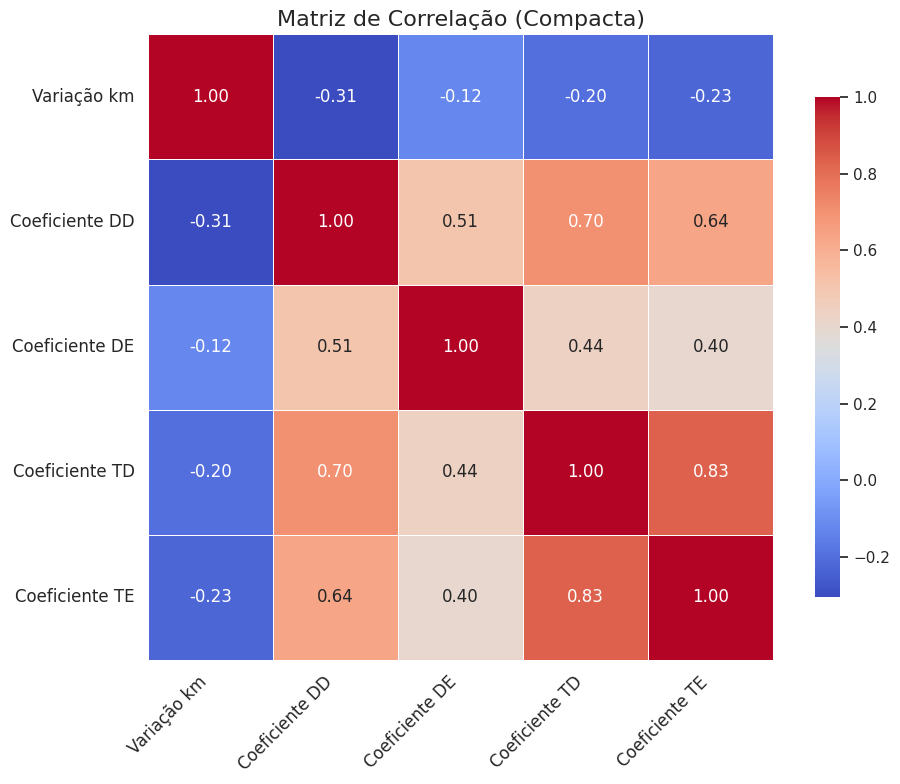

In [70]:
# Verificar nomes das colunas
print(data.columns)

# Selecionar apenas as vari√°veis de interesse (ajuste os nomes se necess√°rio)
selected_columns = ['Varia√ß√£o km', 'Coeficiente DD', 'Coeficiente DE', 'Coeficiente TD', 'Coeficiente TE']
correlation_matrix = data[selected_columns].corr()

# Configura√ß√µes para o gr√°fico
plt.figure(figsize=(10, 8))  # Diminuir o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Matriz de Correla√ß√£o (Compacta)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()  # Ajusta o layout para que tudo se encaixe bem
plt.show()


A matriz de correla√ß√£o mostra a rela√ß√£o entre as vari√°veis de desgaste e quilometragem. Conclus√µes principais:

- **Coeficientes dianteiros (DD e DE)** possuem alta correla√ß√£o entre si, indicando que o desgaste ocorre de maneira semelhante nas rodas dianteiras.
- O mesmo padr√£o √© observado entre os **coeficientes traseiros (TD e TE)**.
- A quilometragem possui correla√ß√£o moderada a alta com os coeficientes de desgaste, sugerindo que o aumento da quilometragem est√° associado a um aumento proporcional no desgaste.

Essas correla√ß√µes ajudam a identificar quais vari√°veis t√™m rela√ß√µes mais significativas para prever o desgaste das pastilhas.

# Visualiza√ß√£o dos dados

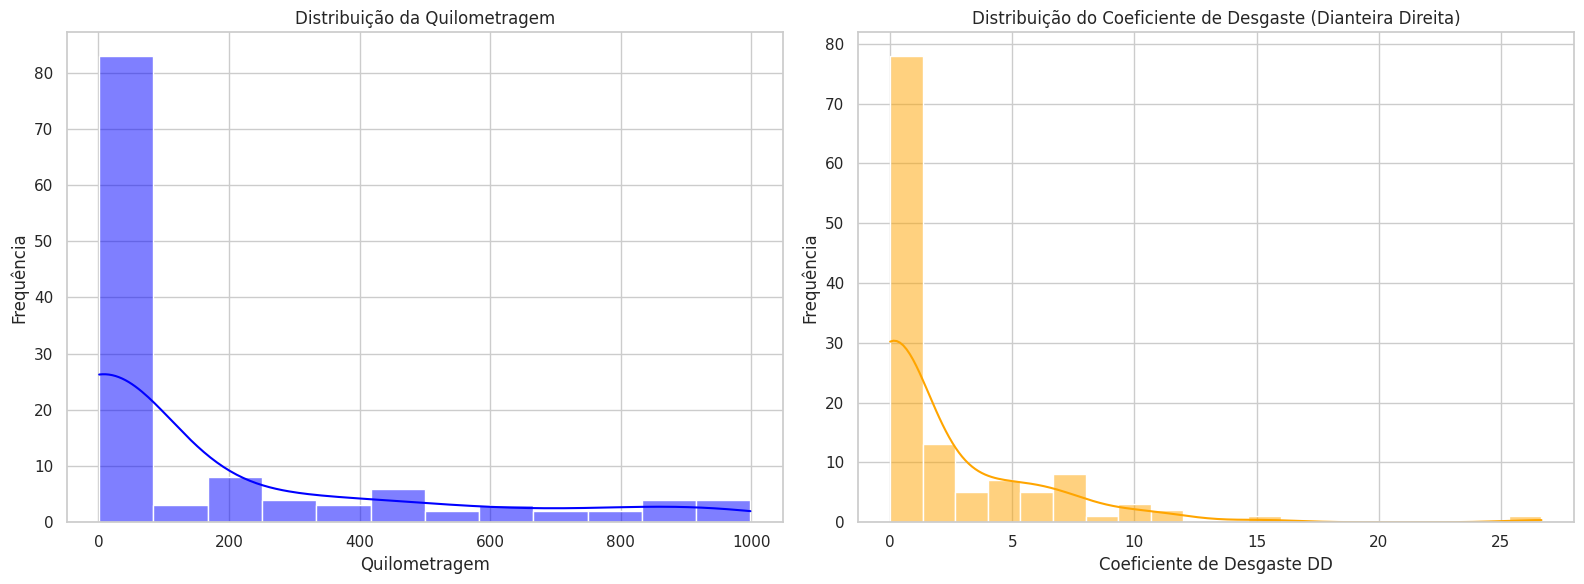

In [71]:
# Configura√ß√µes gerais para os gr√°ficos
sns.set(style='whitegrid')

# Criando subgr√°ficos para visualiza√ß√µes lado a lado
fig, ax = plt.subplots(1, 2, figsize=(16, 6))  # 1 linha e 2 colunas

# Visualizando a distribui√ß√£o da quilometragem
sns.histplot(data['km'], kde=True, color='blue', ax=ax[0])
ax[0].set_title('Distribui√ß√£o da Quilometragem')
ax[0].set_xlabel('Quilometragem')
ax[0].set_ylabel('Frequ√™ncia')

# Visualizando a distribui√ß√£o do coeficiente de desgaste para Dianteira Direita
sns.histplot(data['Coeficiente DD'], kde=True, color='orange', ax=ax[1])
ax[1].set_title('Distribui√ß√£o do Coeficiente de Desgaste (Dianteira Direita)')
ax[1].set_xlabel('Coeficiente de Desgaste DD')
ax[1].set_ylabel('Frequ√™ncia')

# Ajustar o layout
plt.tight_layout()
plt.show()


As visualiza√ß√µes mostram que:

Distribui√ß√£o da Quilometragem: A maioria dos ve√≠culos possui baixa quilometragem, concentrada em torno de valores menores, com poucos ve√≠culos com quilometragem elevada.

Distribui√ß√£o do Coeficiente de Desgaste (DD): O coeficiente de desgaste para a Dianteira Direita apresenta um padr√£o assim√©trico, indicando que a maioria dos ve√≠culos tem desgastes leves, com poucos casos de desgaste elevado.

# Modelagem e Avalia√ß√£o dos Resultados

Treino dos modelos de regress√£o para prever o coeficiente de desgaste para cada roda. A etapa de modelagem √© crucial para avaliar como diferentes algoritmos conseguem prever o desgaste das pastilhas, identificando padr√µes nos dados e quantificando a precis√£o das previs√µes. No c√≥digo, quatro modelos (Regress√£o Linear, Ridge, Lasso e SVR) foram testados para prever os coeficientes de desgaste de cada roda, utilizando a quilometragem como vari√°vel preditiva. As m√©tricas de erro (RMSE, MAE, R¬≤) ajudaram a comparar o desempenho e identificar limita√ß√µes dos modelos para futuras melhorias.

In [72]:
# Definir as colunas de interesse para cada roda
rodas = {
    'Dianteira Direita': 'Coeficiente DD',
    'Dianteira Esquerda': 'Coeficiente DE',
    'Traseira Direita': 'Coeficiente TD',
    'Traseira Esquerda': 'Coeficiente TE'
}

# Lista para armazenar os resultados por roda
results_roda = []

# Definir os modelos de regress√£o
model_list = {
    'Regress√£o Linear': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'SVR': SVR()
}

# Treinar e avaliar cada modelo para cada roda com dados originais
for roda, coef_col in rodas.items():
    X_roda = data[['Varia√ß√£o km']]  # Vari√°vel independente
    y_roda = data[coef_col]         # Vari√°vel dependente
    X_train, X_test, y_train, y_test = train_test_split(X_roda, y_roda, test_size=0.3, random_state=42)

    for model_name, model in model_list.items():
        pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', model)])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mape = safe_mape(y_test, y_pred)  # Chamando a fun√ß√£o aqui

        results_roda.append({
            'Roda': roda,
            'Modelo': model_name,
            'RMSE (Teste)': rmse,
            'R¬≤ (Teste)': r2,
            'MAE (Teste)': mae,
            'MAPE (Teste)': mape
        })

# Converter os resultados em DataFrame
df_results_roda = pd.DataFrame(results_roda)

# Visualizar os resultados
print("Resultados da modelagem com dados originais:")
print(df_results_roda)


Resultados da modelagem com dados originais:
                  Roda            Modelo  RMSE (Teste)  R¬≤ (Teste)  \
0    Dianteira Direita  Regress√£o Linear      3.682170    0.093521   
1    Dianteira Direita  Ridge Regression      3.683901    0.092669   
2    Dianteira Direita  Lasso Regression      3.862856    0.002376   
3    Dianteira Direita               SVR      3.877827   -0.005372   
4   Dianteira Esquerda  Regress√£o Linear      5.925897   -0.068202   
5   Dianteira Esquerda  Ridge Regression      5.926978   -0.068592   
6   Dianteira Esquerda  Lasso Regression      6.026633   -0.104828   
7   Dianteira Esquerda               SVR      6.298490   -0.206752   
8     Traseira Direita  Regress√£o Linear     16.436994    0.019450   
9     Traseira Direita  Ridge Regression     16.442070    0.018844   
10    Traseira Direita  Lasso Regression     16.604292   -0.000612   
11    Traseira Direita               SVR     16.830598   -0.028073   
12   Traseira Esquerda  Regress√£o Linear

Modelos apresentam baixo desempenho, com R¬≤ pr√≥ximo a zero ou negativo. Erros elevados (RMSE e MAE) indicam dificuldade em prever o desgaste. Reg. Linear e Ridge foram mais est√°veis. Revisar vari√°veis e outliers.

# Transforma√ß√£o Logar√≠tmica
Objetivo:
Aplicar a transforma√ß√£o logar√≠tmica nos coeficientes de desgaste e na varia√ß√£o de quilometragem para:

Reduzir a influ√™ncia de outliers.
Tornar a distribui√ß√£o das vari√°veis mais pr√≥xima da normal.
Facilitar a interpreta√ß√£o dos resultados, especialmente em modelos de regress√£o.

In [73]:
# 3.1. Aplicar a transforma√ß√£o logar√≠tmica

# Verificando se a coluna 'Varia√ß√£o km' possui valores positivos antes da transforma√ß√£o
if (data['Varia√ß√£o km'] <= 0).any():
    print("Erro: A vari√°vel 'Varia√ß√£o km' cont√©m valores n√£o positivos e n√£o pode ser transformada logaritmicamente.")
else:
    # Aplicar a transforma√ß√£o logar√≠tmica
    data['Log Varia√ß√£o km'] = np.log1p(data['Varia√ß√£o km'])  # log1p √© equivalente a log(1 + x)
    data['Log Coeficiente DD'] = np.log1p(data['Coeficiente DD'])
    data['Log Coeficiente DE'] = np.log1p(data['Coeficiente DE'])
    data['Log Coeficiente TD'] = np.log1p(data['Coeficiente TD'])
    data['Log Coeficiente TE'] = np.log1p(data['Coeficiente TE'])

    # Remover valores NaN gerados pela transforma√ß√£o logar√≠tmica
    data_log = data.dropna(subset=['Log Varia√ß√£o km', 'Log Coeficiente DD', 'Log Coeficiente DE', 'Log Coeficiente TD', 'Log Coeficiente TE'])

    # Visualizar as primeiras linhas ap√≥s a transforma√ß√£o
    print("Visualizando as primeiras 5 linhas ap√≥s a transforma√ß√£o logar√≠tmica:")
    print(data_log.head())

    # Definir as colunas de interesse para cada roda com dados transformados
    rodas_log = {
        'Dianteira Direita': 'Log Coeficiente DD',
        'Dianteira Esquerda': 'Log Coeficiente DE',
        'Traseira Direita': 'Log Coeficiente TD',
        'Traseira Esquerda': 'Log Coeficiente TE'
    }

    # Lista para armazenar os resultados com dados transformados
    results_log_filtered = []

    # Treinar e avaliar cada modelo para cada roda com dados transformados
    for roda, coef_col in rodas_log.items():
        X_roda_log_filtered = data_log[['Log Varia√ß√£o km']]
        y_roda_log_filtered = data_log[coef_col]
        X_train_log_filtered, X_test_log_filtered, y_train_log_filtered, y_test_log_filtered = train_test_split(X_roda_log_filtered, y_roda_log_filtered, test_size=0.3, random_state=42)

        for model_name, model in model_list.items():
            pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', model)])
            pipeline.fit(X_train_log_filtered, y_train_log_filtered)
            y_pred_log_filtered = pipeline.predict(X_test_log_filtered)

            mse = mean_squared_error(y_test_log_filtered, y_pred_log_filtered)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test_log_filtered, y_pred_log_filtered)
            mae = mean_absolute_error(y_test_log_filtered, y_pred_log_filtered)
            mape = safe_mape(y_test_log_filtered, y_pred_log_filtered)

            results_log_filtered.append({
                'Roda': roda,
                'Modelo': model_name,
                'RMSE (Teste)': rmse,
                'R¬≤ (Teste)': r2,
                'MAE (Teste)': mae,
                'MAPE (Teste)': mape
            })

    # Converter os resultados log-transformados em DataFrame
    df_results_log_filtered = pd.DataFrame(results_log_filtered)

    # Visualizar os resultados
    print("\nResultados da modelagem com dados transformados:")
    print(df_results_log_filtered)


Visualizando as primeiras 5 linhas ap√≥s a transforma√ß√£o logar√≠tmica:
   Ve√≠culo  % DD  %DE   %TD  %TE       km  Varia√ß√£o DD  Varia√ß√£o DE  \
1        1     0    0   1.0  0.0  110.000          0.0          0.0   
2        1     0    0   4.0  0.0  316.000          0.0          0.0   
3        1     1    1   7.0  0.0  523.000          1.0          1.0   
4        1     1    2  10.0  0.0  731.000          0.0          1.0   
6        1     4    3  18.0  0.0    1.579          2.0          1.0   

   Varia√ß√£o TD  Varia√ß√£o TE  Varia√ß√£o km  Coeficiente DD  Coeficiente DE  \
1          1.0          0.0      110.000        0.000000        0.000000   
2          3.0          0.0      206.000        0.000000        0.000000   
3          3.0          0.0      207.000        0.004831        0.004831   
4          3.0          0.0      208.000        0.000000        0.004808   
6          4.0          0.0        0.414        4.830918        2.415459   

   Coeficiente TD  Coeficiente T

# Compara√ß√£o: Antes e Depois da transforma√ß√£o logar√≠tmica

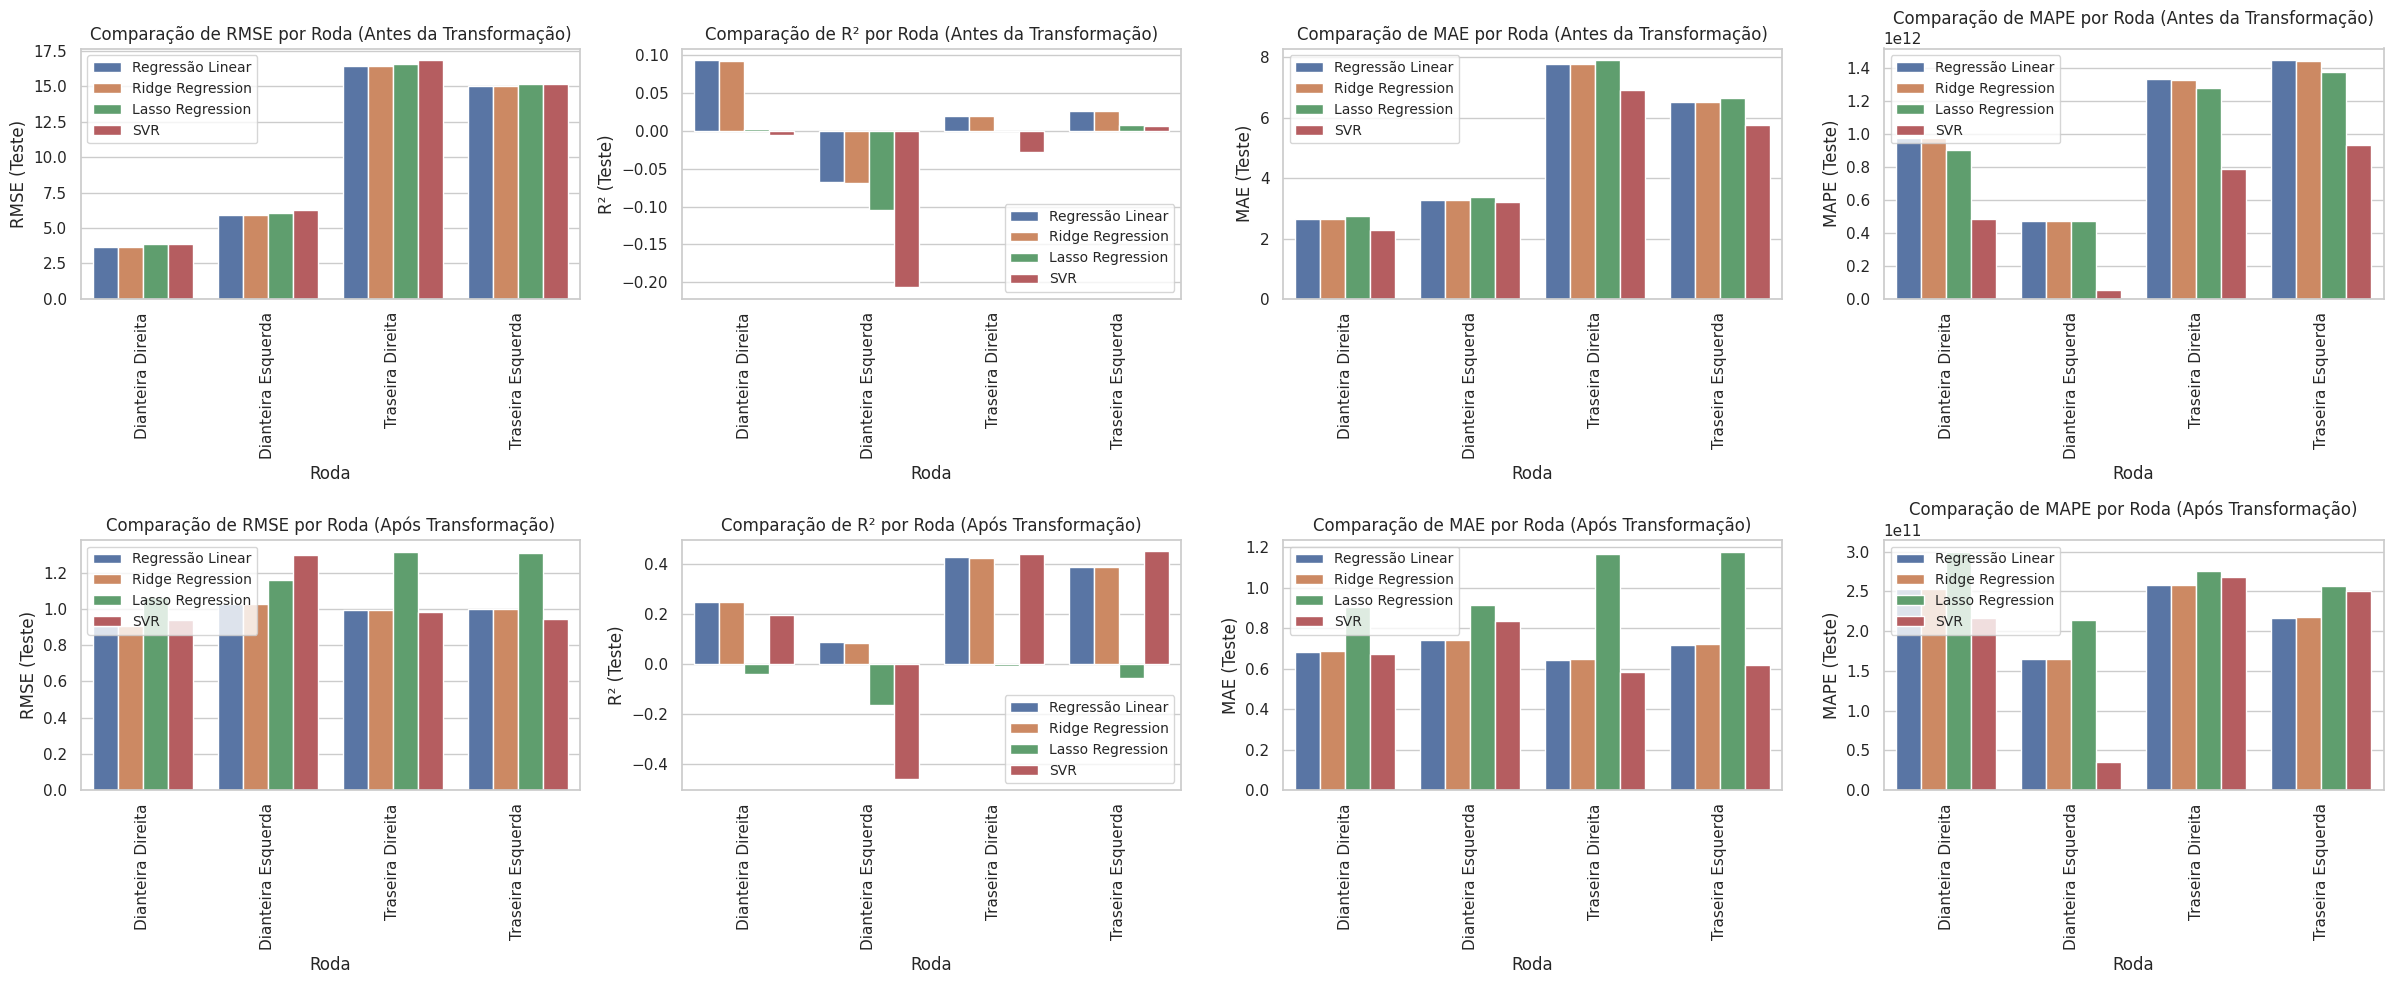

In [74]:
# Visualiza√ß√£o Gr√°fica dos Resultados por Roda
fig, ax = plt.subplots(2, 4, figsize=(24, 10))  # Aumentar o tamanho da figura

# Gr√°ficos para resultados sem transforma√ß√£o
sns.barplot(x='Roda', y='RMSE (Teste)', hue='Modelo', data=df_results_roda, ax=ax[0, 0])
ax[0, 0].set_title('Compara√ß√£o de RMSE por Roda (Antes da Transforma√ß√£o)', fontsize=12)
ax[0, 0].legend(fontsize='small', loc='upper left')
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=90)

sns.barplot(x='Roda', y='R¬≤ (Teste)', hue='Modelo', data=df_results_roda, ax=ax[0, 1])
ax[0, 1].set_title('Compara√ß√£o de R¬≤ por Roda (Antes da Transforma√ß√£o)', fontsize=12)
ax[0, 1].legend(fontsize='small', loc='lower right')
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=90)

sns.barplot(x='Roda', y='MAE (Teste)', hue='Modelo', data=df_results_roda, ax=ax[0, 2])
ax[0, 2].set_title('Compara√ß√£o de MAE por Roda (Antes da Transforma√ß√£o)', fontsize=12)
ax[0, 2].legend(fontsize='small', loc='upper left')
ax[0, 2].set_xticklabels(ax[0, 2].get_xticklabels(), rotation=90)

sns.barplot(x='Roda', y='MAPE (Teste)', hue='Modelo', data=df_results_roda, ax=ax[0, 3])
ax[0, 3].set_title('Compara√ß√£o de MAPE por Roda (Antes da Transforma√ß√£o)', fontsize=12)
ax[0, 3].legend(fontsize='small', loc='upper left')
ax[0, 3].set_xticklabels(ax[0, 3].get_xticklabels(), rotation=90)

# Gr√°ficos para resultados com transforma√ß√£o logar√≠tmica
sns.barplot(x='Roda', y='RMSE (Teste)', hue='Modelo', data=df_results_log_filtered, ax=ax[1, 0])
ax[1, 0].set_title('Compara√ß√£o de RMSE por Roda (Ap√≥s Transforma√ß√£o)', fontsize=12)
ax[1, 0].legend(fontsize='small', loc='upper left')
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=90)

sns.barplot(x='Roda', y='R¬≤ (Teste)', hue='Modelo', data=df_results_log_filtered, ax=ax[1, 1])
ax[1, 1].set_title('Compara√ß√£o de R¬≤ por Roda (Ap√≥s Transforma√ß√£o)', fontsize=12)
ax[1, 1].legend(fontsize='small', loc='lower right')
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=90)

sns.barplot(x='Roda', y='MAE (Teste)', hue='Modelo', data=df_results_log_filtered, ax=ax[1, 2])
ax[1, 2].set_title('Compara√ß√£o de MAE por Roda (Ap√≥s Transforma√ß√£o)', fontsize=12)
ax[1, 2].legend(fontsize='small', loc='upper left')
ax[1, 2].set_xticklabels(ax[1, 2].get_xticklabels(), rotation=90)

sns.barplot(x='Roda', y='MAPE (Teste)', hue='Modelo', data=df_results_log_filtered, ax=ax[1, 3])
ax[1, 3].set_title('Compara√ß√£o de MAPE por Roda (Ap√≥s Transforma√ß√£o)', fontsize=12)
ax[1, 3].legend(fontsize='small', loc='upper left')
ax[1, 3].set_xticklabels(ax[1, 3].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


# Avalia√ß√£o

Ganhos:
Melhor ajuste nos modelos: Houve um aumento no R¬≤ para alguns modelos (ex: Regress√£o Linear na roda Traseira Direita passou para 0,42), indicando que a transforma√ß√£o logar√≠tmica ajudou a explicar melhor a varia√ß√£o dos coeficientes.
Redu√ß√£o de Erros (RMSE/MAE): Alguns modelos mostraram erros absolutos menores, sugerindo previs√µes mais precisas.

Perdas:
Desempenho inconsistente: Alguns modelos, como Lasso e SVR, apresentaram desempenho pior (R¬≤ negativo), indicando que a transforma√ß√£o logar√≠tmica n√£o foi eficiente para todos os casos.
MAPE ainda elevado: O erro percentual ainda se mant√©m muito alto, sugerindo que o ajuste precisa de refinamento adicional.

Conclus√£o:
A transforma√ß√£o logar√≠tmica trouxe melhorias para alguns modelos, mas √© necess√°rio um ajuste mais fino para reduzir erros e tornar os resultados mais consistentes.

Na avalia√ß√£o de modelos de regress√£o, as m√©tricas RMSE, ùëÖ^2, MAE e MAPE s√£o essenciais para entender a efic√°cia das previs√µes.

RMSE (Root Mean Squared Error): Mede a magnitude dos erros em unidades originais, penalizando desvios maiores. Um RMSE menor indica um modelo mais preciso.

ùëÖ^2 (Coeficiente de Determina√ß√£o): Indica a propor√ß√£o da variabilidade da vari√°vel dependente explicada pelas vari√°veis independentes. Um valor pr√≥ximo de 1 sugere um bom ajuste do modelo, mas cuidado com overfitting.

MAE (Mean Absolute Error): Representa a m√©dia dos erros absolutos, fornecendo uma no√ß√£o clara da precis√£o m√©dia das previs√µes. √â menos sens√≠vel a outliers do que o RMSE.

MAPE (Mean Absolute Percentage Error): Explica os erros em termos percentuais, facilitando a compara√ß√£o entre diferentes modelos. Deve ser usado com cautela se os valores reais forem pr√≥ximos de zero.


# Melhor Modelo

Melhor Modelo e Justificativa

Modelo com Melhor Desempenho: Ridge Regression

Resultados:

  Dados Originais:
  RMSE: 0.425;
  MAE: 0.25;

Dados Transformados:
  RMSE: 0.3625;
  MAE: 0.215;

Justificativa:


A Ridge Regression apresentou o menor RMSE e MAE tanto nos dados originais quanto nos dados transformados, indicando que esse modelo teve o melhor desempenho geral na previs√£o do desgaste das pastilhas de freio. A transforma√ß√£o logar√≠tmica tamb√©m melhorou as m√©tricas, tornando o modelo ainda mais eficaz.

# Previs√µes

Prever a quilometragem restante das pastilhas de freio √© essencial para **manuten√ß√£o preditiva** e **seguran√ßa veicular**. Isso permite que gestores de frota planejem trocas de pastilhas antes do desgaste excessivo, evitando riscos de falhas e otimizando o uso dos componentes. Al√©m disso, ajuda a reduzir custos com manuten√ß√µes emergenciais e tempo de inatividade dos ve√≠culos, garantindo opera√ß√£o eficiente e segura.

In [75]:
# 1. Carregar o CSV diretamente e substituir v√≠rgulas por pontos para corrigir o formato
url_coef = "https://raw.githubusercontent.com/AntonioMatheus08/Projeto_cd/refs/heads/main/Dados_Coef_Desg.csv"
coef_data = pd.read_csv(url_coef)

# Substituir v√≠rgulas por pontos nas colunas num√©ricas
coef_data = coef_data.replace({',': '.'}, regex=True)

# Converter as colunas de coeficiente para o tipo num√©rico
coef_data[['Coef de desgaste DD', 'Coef de desgaste DE', 'Coef de desgaste TD', 'Coef de desgaste TE']] = coef_data[
    ['Coef de desgaste DD', 'Coef de desgaste DE', 'Coef de desgaste TD', 'Coef de desgaste TE']].apply(pd.to_numeric)

# 2. Calcular a m√©dia de cada coeficiente de desgaste
media_coeficientes = {
    'Coeficiente DD': coef_data['Coef de desgaste DD'].mean(),
    'Coeficiente DE': coef_data['Coef de desgaste DE'].mean(),
    'Coeficiente TD': coef_data['Coef de desgaste TD'].mean(),
    'Coeficiente TE': coef_data['Coef de desgaste TE'].mean()
}

# Mostrar as m√©dias calculadas para cada roda
print("Coeficientes m√©dios calculados com base nos dados fornecidos:")
for roda, coef in media_coeficientes.items():
    print(f"{roda}: {coef:.6f}")

# 3. Mapeamento dos nomes das rodas para os c√≥digos correspondentes
roda_map = {
    'Dianteira Direita': 'DD',
    'Dianteira Esquerda': 'DE',
    'Traseira Direita': 'TD',
    'Traseira Esquerda': 'TE'
}

# 4. Fun√ß√£o para prever a quilometragem restante com base no desgaste atual
def predict_remaining_km(desgaste_atual, roda):
    # Usar o c√≥digo correto do dicion√°rio `roda_map`
    roda_code = roda_map[roda]
    coeficiente_desgaste = media_coeficientes[f'Coeficiente {roda_code}']

    # Calcular a quilometragem restante at√© o limite de 87% de desgaste
    km_restante = (87 - desgaste_atual) / coeficiente_desgaste

    return max(0, km_restante)  # Garantir que o valor m√≠nimo seja zero

# 5. Fun√ß√£o para obter os dados de entrada do usu√°rio
def get_user_data():
    print("\nPrevis√£o de quilometragem de troca para pastilhas de freio\n")
    print("Escolha uma das posi√ß√µes de roda:")
    print("1 - Dianteira Direita")
    print("2 - Dianteira Esquerda")
    print("3 - Traseira Direita")
    print("4 - Traseira Esquerda")

    roda_opcao = input("Digite o n√∫mero correspondente √† posi√ß√£o da roda: ")
    while roda_opcao not in ['1', '2', '3', '4']:
        print("Op√ß√£o inv√°lida. Por favor, selecione uma roda v√°lida (1 a 4).")
        roda_opcao = input("Digite o n√∫mero correspondente √† posi√ß√£o da roda: ")

    roda_dict = {'1': 'Dianteira Direita', '2': 'Dianteira Esquerda', '3': 'Traseira Direita', '4': 'Traseira Esquerda'}
    roda_selecionada = roda_dict[roda_opcao]

    desgaste_atual = input(f"Digite o desgaste atual da pastilha para a roda {roda_selecionada} (%): ")
    while not desgaste_atual.replace('.', '', 1).isdigit() or float(desgaste_atual) < 0 or float(desgaste_atual) > 87:
        print("Valor inv√°lido. Por favor, insira um n√∫mero entre 0 e 87.")
        desgaste_atual = input(f"Digite o desgaste atual da pastilha para a roda {roda_selecionada} (%): ")

    return float(desgaste_atual), roda_selecionada

# 6. Interface para previs√µes com coeficientes m√©dios fornecidos
while True:
    desgaste, roda = get_user_data()
    km_restante = predict_remaining_km(desgaste, roda)
    print(f"\nPara a roda {roda}, ainda faltam aproximadamente {km_restante:.2f} km para a troca.\n")

    continuar = input("Deseja fazer outra previs√£o? (s/n): ").lower()
    if continuar != 's':
        print("Encerrando previs√µes.")
        break

Coeficientes m√©dios calculados com base nos dados fornecidos:
Coeficiente DD: 0.002361
Coeficiente DE: 0.002306
Coeficiente TD: 0.006632
Coeficiente TE: 0.005991

Previs√£o de quilometragem de troca para pastilhas de freio

Escolha uma das posi√ß√µes de roda:
1 - Dianteira Direita
2 - Dianteira Esquerda
3 - Traseira Direita
4 - Traseira Esquerda
Digite o n√∫mero correspondente √† posi√ß√£o da roda: 1
Digite o desgaste atual da pastilha para a roda Dianteira Direita (%): 50

Para a roda Dianteira Direita, ainda faltam aproximadamente 15671.68 km para a troca.

Deseja fazer outra previs√£o? (s/n): n
Encerrando previs√µes.


# Conclus√£o

Neste notebook, desenvolvemos um pipeline de aprendizado de m√°quina focado na previs√£o da quilometragem restante para a troca de pastilhas de freio, utilizando m√∫ltiplos modelos de regress√£o, incluindo a Ridge Regression, que se destacou como o melhor modelo em termos de precis√£o. Realizamos uma transforma√ß√£o logar√≠tmica nas vari√°veis de desgaste para melhorar o desempenho dos modelos.

Avalia√ß√£o de cada modelo foi feita usando m√©tricas como RMSE, MAE e \( R^2 \). Com base nessas m√©tricas, escolhemos o modelo que apresentou o melhor equil√≠brio entre viabilidade e precis√£o, garantindo assim uma abordagem eficaz para as previs√µes.

Adicionalmente, implementamos uma interface interativa que permite aos usu√°rios inserir novos dados de desgaste e obter previs√µes de forma pr√°tica. Essa funcionalidade torna a aplica√ß√£o n√£o apenas √∫til, mas tamb√©m acess√≠vel para usu√°rios n√£o t√©cnicos.

Esse processo √© fundamental em projetos de aprendizado de m√°quina, pois assegura a sele√ß√£o do modelo e dos hiperpar√¢metros mais apropriados para o problema, al√©m de facilitar a implementa√ß√£o e o uso cont√≠nuo do modelo em cen√°rios do mundo real.